In [1]:
from src import Q_Learning

In [2]:
r = Q_Learning(capture=True)

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9


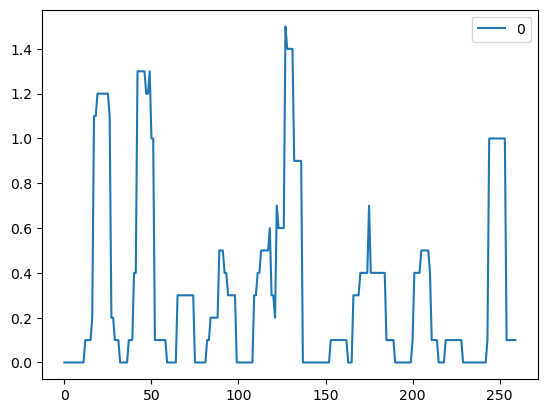

In [3]:
game = r.learn(750)

In [4]:
# Save the game in a pgn file
new_pgn = open("game.pgn", "w", encoding="utf-8")

<Axes: title={'center': 'average performance over the last 125 steps'}>

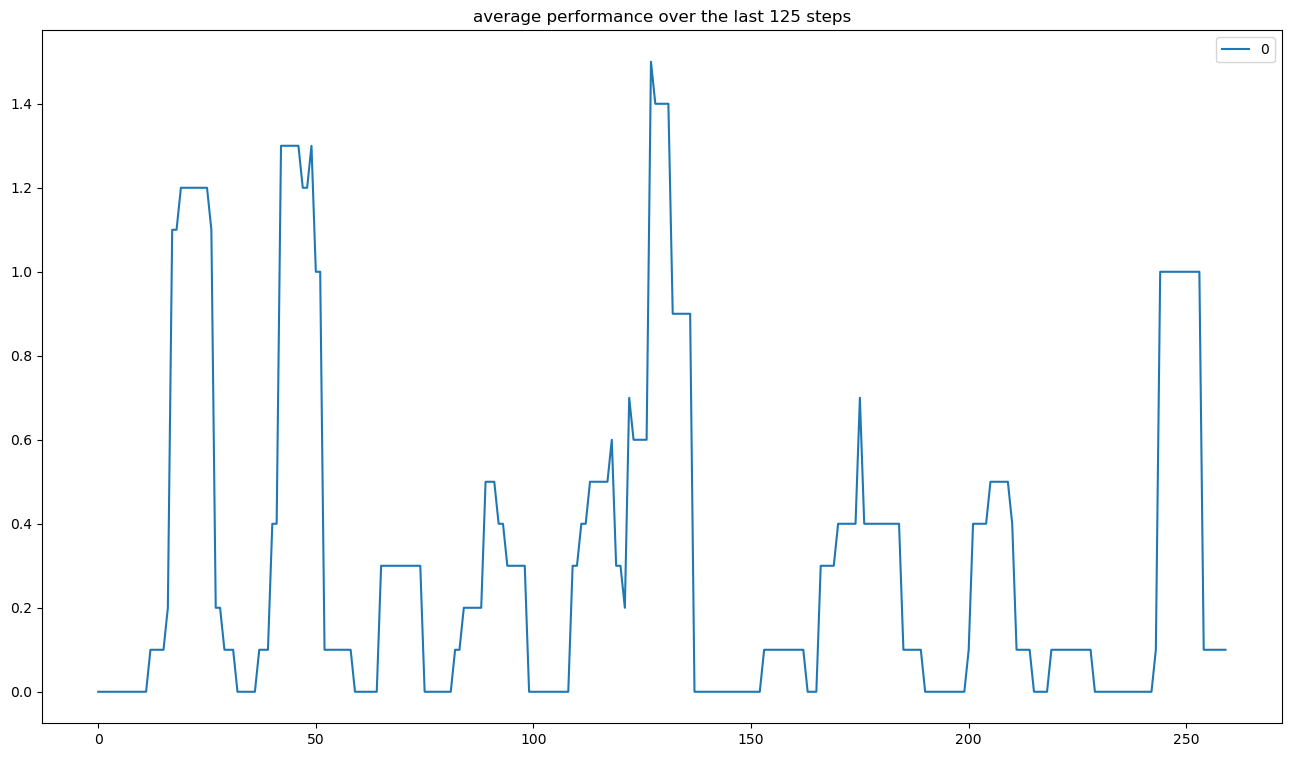

In [5]:
import pandas as pd
reward_smooth = pd.DataFrame(r.reward_trace)
reward_smooth.rolling(window=10,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 125 steps')

In [6]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. e3 c5 2. g4 Nh6 3. Nf3 Qb6 4. Nh4 e6 5. Ng2 c4 6. c3 Qb5 7. a3 Nc6 8. Bd3 Be7 9. Bg6 Qf5 10. Bxh7 Rb8 11. Bxf5 d5 12. Bg6 Nd4 13. Bh7 Bf6 14. Qa4+ Kf8 15. Qb4+ Ke8 16. Qb5+ Nxb5 17. Kd1 Nd6 18. h4 Be5 19. Ke1 d4 20. exd4 Ng8 21. Kd1 Kd7 22. Ke1 Nb5 23. Kd1 a5 24. Bf5 f6 25. Bg6 a4 26. Rg1 Bh2 *


In [7]:
import numpy as np
import torch

r.env.reset()
bl = r.env.layer_board
bl[6, :, :] = 1/10  # Assume we are on move 10

bl_tensor = torch.from_numpy(bl).unsqueeze(0).float()  # Convert bl to a torch.Tensor

av = r.agent.get_action_values(bl_tensor)
av = av.reshape((64, 64))

p = r.env.board.piece_at(20)  # .symbol()

# Convert av to a NumPy array
av_np = av.detach().numpy()

white_pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
black_piece = ['_', 'p', 'n', 'b', 'r', 'q', 'k']

df = pd.DataFrame(np.zeros((6, 7)))

df.index = white_pieces
df.columns = black_piece

for from_square in range(16):
    for to_square in range(30, 64):
        from_piece = r.env.board.piece_at(from_square).symbol()
        to_piece = r.env.board.piece_at(to_square)
        if to_piece:
            to_piece = to_piece.symbol()
        else:
            to_piece = '_'
        df.loc[from_piece, to_piece] = av_np[from_square, to_square]

In [8]:
df[['_','p','n','b','r','q']]

,_,p,n,b,r,q
P,0.033193,-0.124015,0.071673,0.013210,0.112036,0.012543
N,0.043799,0.050639,-0.177238,-0.011880,-0.145602,-0.142961
B,0.031758,-0.006334,0.053659,0.187846,-0.207855,-0.233938
R,0.017731,-0.034720,0.100516,-0.053846,0.102359,-0.174998
Q,-0.211371,0.116756,-0.255907,-0.066202,-0.033220,0.028153
K,-0.213654,-0.186925,-0.174127,-0.073556,-0.035256,-0.062518
